In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def sigmoid(z):
  return 1/(1+np.exp(-z))


In [ ]:
def compute_cost(X, y, w, b):

    m = X.shape[0]

    z = np.dot(X, w) + b
    h = 1 / (1 + np.exp(-z))

    epsilon = 1e-15

    cost = -(1/m) * np.sum(
        y * np.log(h + epsilon) +
        (1 - y) * np.log(1 - h + epsilon)
    )

    return cost

In [ ]:
def train_logistic_regression(X, y, learning_rate, epochs):
  m,n = X.shape
  w = np.zeros(n)
  b = 0
  cost_history = []
  iteration_history = []

  for i in range(epochs):
    z = np.dot(X,w) + b
    h = sigmoid(z)
    error = h - y

    dw = np.dot(X.T , error)/m
    db = np.sum(error)/m

    w = w - learning_rate*dw
    b = b - learning_rate*db

    cost = compute_cost(X, y, w, b)
    cost_history.append(cost)
    iteration_history.append(i)

  return w,b, cost_history, iteration_history

In [ ]:
def predict(X, w, b):
  z = np.dot(X, w) + b
  h = sigmoid(z)
  y = (h >= 0.5).astype(int)
  return y

In [ ]:
X = np.array([[1],[2],[3],[4],[5],[6],[7],[8]])
y = np.array([0,0,0,0,1,1,1,1])

w, b, cost_history, iteration_history = train_logistic_regression(X, y, learning_rate=0.1, epochs=1000)

print("Weights: ",w)
print("Bias: ",b)

Weights:  [1.32236696]
Bias:  -5.67648623486239


In [ ]:
predictions = predict(X, w, b)
print("Prediction: ", predictions)

Prediction:  [0 0 0 0 1 1 1 1]


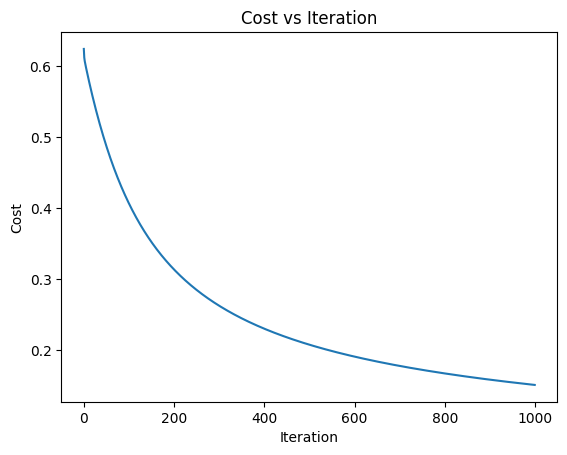

In [ ]:
plt.plot(iteration_history, cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost vs Iteration")
plt.show()

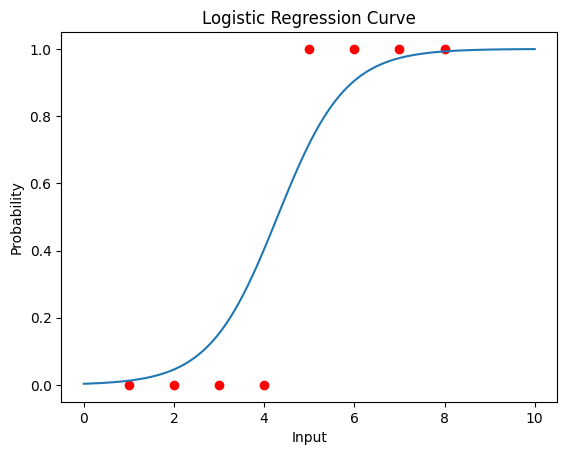

In [ ]:
plt.scatter(X,y,color="red")
x_line = np.linspace(0,10,100)
y_line = sigmoid(w*x_line + b)

plt.plot(x_line, y_line)
plt.xlabel("Input")
plt.ylabel("Probability")
plt.title("Logistic Regression Curve")
plt.show()